In [26]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import warnings
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, confusion_matrix,ConfusionMatrixDisplay

In [12]:
table = pq.read_table("wine_features.parquet")
df = table.to_pandas()
df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


In [38]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['quality_label','quality']), df[['quality_label']],test_size=0.2,shuffle=True,random_state=42)

In [43]:
baselines = {
    "dummy": DummyClassifier(strategy='most_frequent'),
    "knn": KNeighborsClassifier(n_neighbors=5,weights="distance",metric="minkowski"),
    'naive_bayesian': GaussianNB(var_smoothing=1e-9),
    'logistic': LogisticRegression(C=1,penalty='l2',solver="lbfgs" ,max_iter=200,multi_class='auto'),
    'svm': LinearSVC(C=1,penalty='l2'),
    'decision_tree': DecisionTreeClassifier(max_depth=3,criterion='gini'),
    'random_forest': RandomForestClassifier(n_estimators=100,max_depth=2)
}

In [44]:
rows = []

for name in baselines:
    model = baselines[name]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred,average='macro')
    b_acc = balanced_accuracy_score(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    row = {"name": name, "acc": acc, "f1 macro": f1, "balanced_acc":b_acc, 'cm': cm}
    rows.append(row)

In [45]:
print(y_test)
count = {}

for i in y_test['quality_label']:
    if i in count:
        count[i] += 1
    else:
        count [i] = 1

for i in count:
    print(f"count of {i}: ", count[i])

     quality_label
803         medium
124            low
350         medium
682            low
1326        medium
...            ...
1259        medium
1295           low
1155           low
963         medium
704            low

[320 rows x 1 columns]
count of medium:  132
count of low:  141
count of high:  47


baseline:  dummy
accuracy rate:  0.440625
f1 marco score:  0.20390455531453364
balanced accuracy rate:  0.3333333333333333


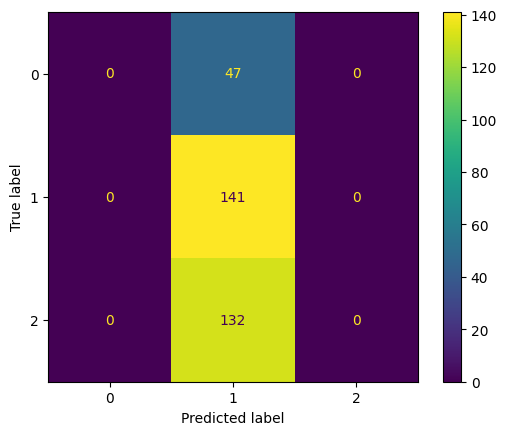

baseline:  knn
accuracy rate:  0.5625
f1 marco score:  0.547034615657616
balanced accuracy rate:  0.5401891252955083


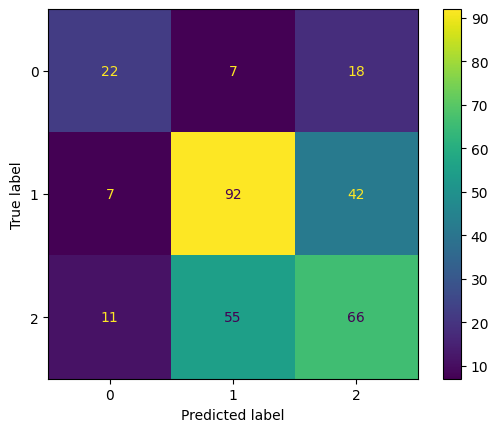

baseline:  naive_bayesian
accuracy rate:  0.596875
f1 marco score:  0.5775707685141648
balanced accuracy rate:  0.5901568880292284


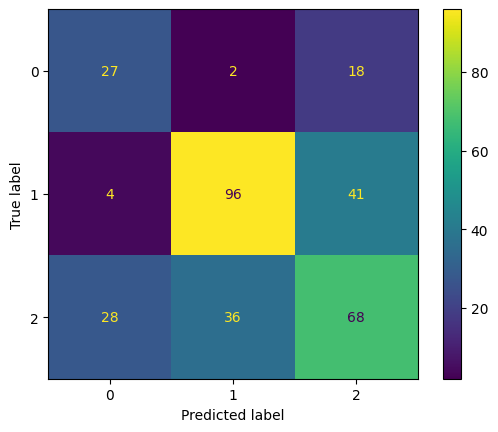

baseline:  logistic
accuracy rate:  0.59375
f1 marco score:  0.5260881870153393
balanced accuracy rate:  0.521598968407479


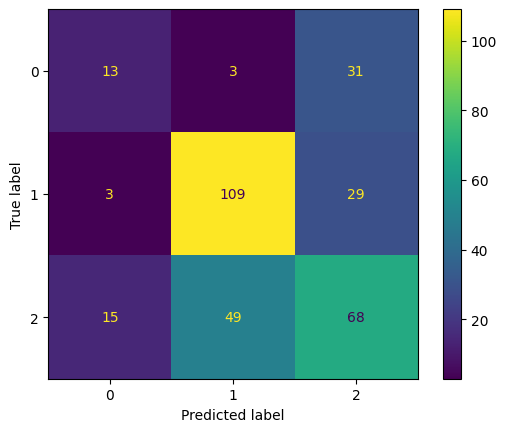

baseline:  svm
accuracy rate:  0.603125
f1 marco score:  0.4736721035313312
balanced accuracy rate:  0.48678272082527396


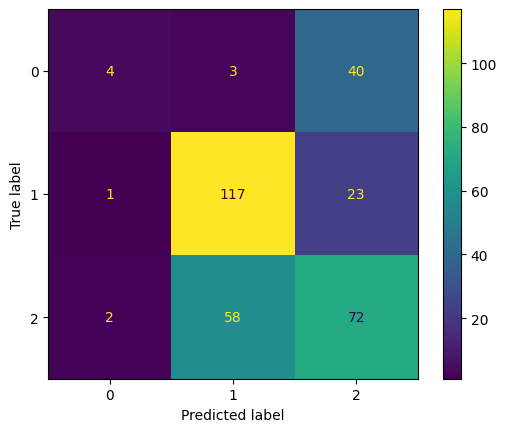

baseline:  decision_tree
accuracy rate:  0.58125
f1 marco score:  0.5362677489866707
balanced accuracy rate:  0.5204169353105522


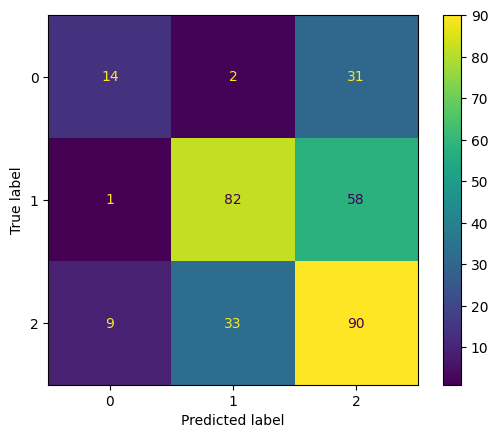

baseline:  random_forest
accuracy rate:  0.571875
f1 marco score:  0.40314936436609444
balanced accuracy rate:  0.4431012250161186


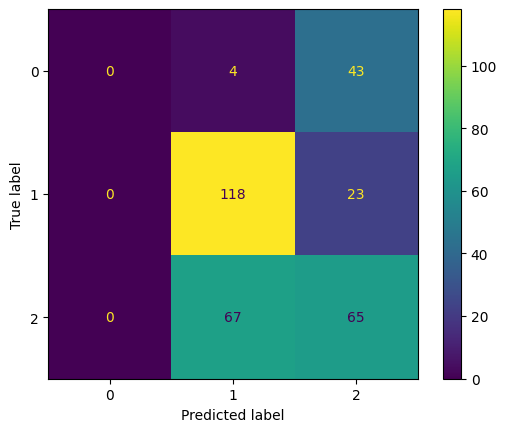

In [46]:
for row in rows:
    print("baseline: ", row['name'])
    print("accuracy rate: ", row['acc'])
    print("f1 marco score: ", row['f1 macro'])
    print("balanced accuracy rate: ", row['balanced_acc'])
    cm = ConfusionMatrixDisplay(row['cm'])
    cm.plot()
    plt.show()
